In [1]:
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/lib/wsl/lib'

In [2]:
from karabo.imaging.imager import Imager
from karabo.simulation.telescope import Telescope
from karabo.simulation.observation import Observation, ObservationLong
from karabo.simulation.interferometer import InterferometerSimulation
from karabo.simulation.sky_model import SkyModel
from karabo.sourcedetection.result import SourceDetectionResult, PyBDSFSourceDetectionResult
from karabo.sourcedetection.evaluation import SourceDetectionEvaluation
import numpy as np
import matplotlib.pyplot as plt
# Render plots inline
%matplotlib inline

The RASCIL data directory is not available - continuing but any simulations will fail


In [22]:
def create_random_sources(num_sources, ranges):
    """
    Create a random set of sources.

    :param num_sources: number of sources to create
    :param ranges: list of ranges for each parameter. 
    
    Description of ranges:

    - [0] right ascension (deg)-
    - [1] declination (deg)
    - [2] stokes I Flux (Jy)
    - [3] stokes Q Flux (Jy): defaults to 0
    - [4] stokes U Flux (Jy): defaults to 0
    - [5] stokes V Flux (Jy): defaults to 0
    - [6] reference_frequency (Hz): defaults to 0
    - [7] spectral index (N/A): defaults to 0
    - [8] rotation measure (rad / m^2): defaults to 0
    - [9] major axis FWHM (arcsec): defaults to 0
    - [10] minor axis FWHM (arcsec): defaults to 0
    - [11] position angle (deg): defaults to 0
    - [12] source id (object): defaults to None

    """
    ra_min, ra_max = ranges[0]
    dec_min, dec_max = ranges[1]
    flux_I_min, flux_I_max = ranges[2]
    flux_Q_min, flux_Q_max = ranges[3]
    flux_U_min, flux_U_max = ranges[4]
    flux_V_min, flux_V_max = ranges[5]
    freq_min, freq_max = ranges[6]
    sp_index_min, sp_index_max = ranges[7]
    rm_min, rm_max = ranges[8]
    major_axis_min, major_axis_max = ranges[9]
    minor_axis_min, minor_axis_max = ranges[10]
    pos_angle_min, pos_angle_max = ranges[11]

    ra = np.random.uniform(ra_min, ra_max, num_sources)
    dec = np.random.uniform(dec_min, dec_max, num_sources)
    flux_I = np.random.uniform(flux_I_min, flux_I_max, num_sources)
    flux_Q = np.random.uniform(flux_Q_min, flux_Q_max, num_sources)
    flux_U = np.random.uniform(flux_U_min, flux_U_max, num_sources)
    flux_V = np.random.uniform(flux_V_min, flux_V_max, num_sources)
    freq = np.random.uniform(freq_min, freq_max, num_sources)
    sp_index = np.random.uniform(sp_index_min, sp_index_max, num_sources)
    rm = np.random.uniform(rm_min, rm_max, num_sources)
    major_axis = np.random.uniform(major_axis_min, major_axis_max, num_sources)
    minor_axis = np.random.uniform(minor_axis_min, minor_axis_max, num_sources)
    pos_angle = np.random.uniform(pos_angle_min, pos_angle_max, num_sources)

    sources = np.column_stack(
        (ra, dec, flux_I, flux_Q, flux_U, flux_V, freq, sp_index, rm, major_axis, minor_axis, pos_angle)
    )

    return sources

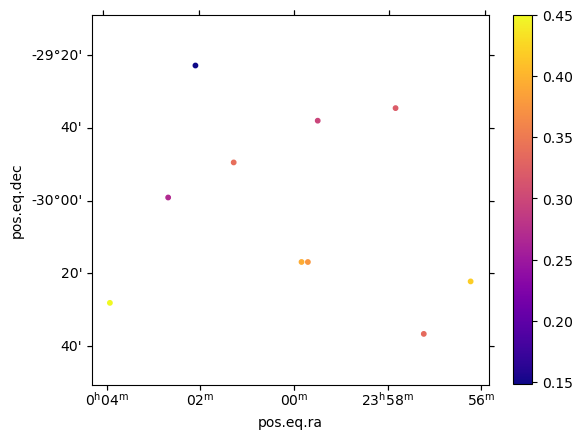

In [26]:
sky = SkyModel()
sky_data = create_random_sources(10, [[-1, 1], [-29, -31], [1, 3], [0, 2], [0, 2], [0, 2], [100.0e6, 100.0e6], [-0.7, -0.7], [0.0, 0.0], [0, 600], [50, 50], [45, 45]])
sky.add_point_sources(sky_data)
sky.explore_sky([0, -30], s=10)

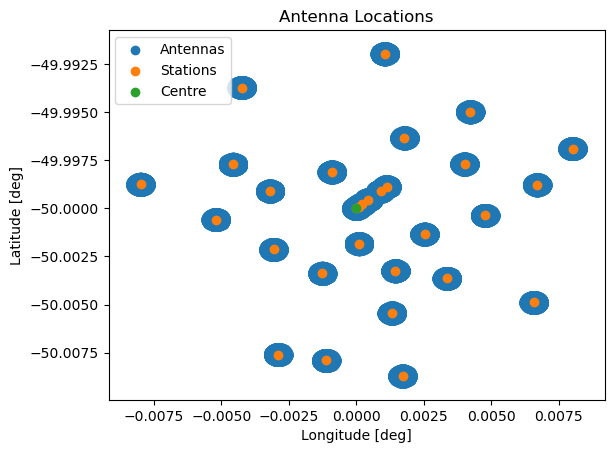

In [28]:
telescope = Telescope.get_OSKAR_Example_Telescope()
telescope.plot_telescope()


In [30]:
observation_settings = ObservationLong(
    # length=4 hours
    start_frequency_hz=100e6,
    phase_centre_ra_deg=0,
    phase_centre_dec_deg=-30,
    number_of_channels=100000,
    number_of_time_steps=10, # Integration time?
    number_of_days=2,
)

interferometer_sim = InterferometerSimulation(channel_bandwidth_hz=1e6, vis_path='./data/visibilities.ms')
visibility_askap = interferometer_sim.run_simulation(telescope, sky, observation_settings)

use_gpu is None, using is_cuda_available() to set use_gpu to True
Created dirs ./data/visibilities.ms
Observing Day: 0 the 2023-01-30 15:21:13.878667
./data/visibilities.ms/beam_vis_0.vis


In [ ]:
imaging_npixel = 2048
imaging_cellsize = 3.878509448876288e-05

In [ ]:
imager_askap = Imager(
    visibility_askap,
    imaging_npixel = imaging_npixel,
    imaging_cellsize = imaging_cellsize,
)
dirty = imager_askap.get_dirty_image()
dirty.plot(title='Dirty image')